# Illustrates integration using Simpson's rule

**Randall Romero Aguilar, PhD**

This demo is based on the original Matlab demo accompanying the  <a href="https://mitpress.mit.edu/books/applied-computational-economics-and-finance">Computational Economics and Finance</a> 2001 textbook by Mario Miranda and Paul Fackler.

Original (Matlab) CompEcon file: **demqua08.m**

Running this file requires the Python version of CompEcon. This can be installed with pip by running

    !pip install compecon --upgrade

<i>Last updated: 2021-Oct-01</i>
<hr>

## Initial tasks


In [1]:
from numpy import poly1d,polyfit, linspace
from compecon import qnwsimp
import matplotlib.pyplot as plt

In [2]:
n = 1001
xmin, xmax = -1, 1
xwid = xmax-xmin
x = linspace(xmin, xmax, n)

In [3]:
f = poly1d([2.0, -1.0, 0.5, 5.0])

In [4]:
def fitquad(xi):
    newcoef = polyfit(xi, f(xi), 2)
    return poly1d(newcoef)

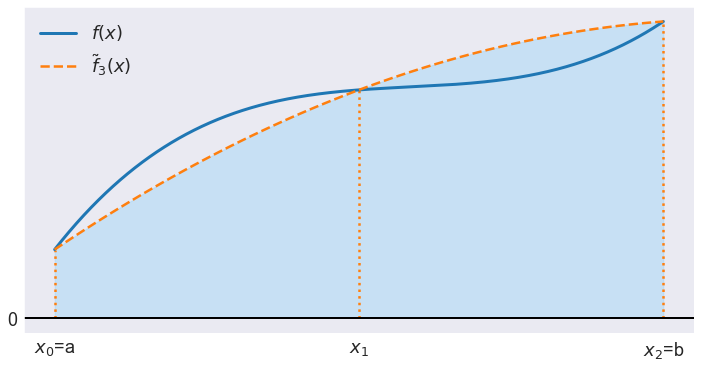

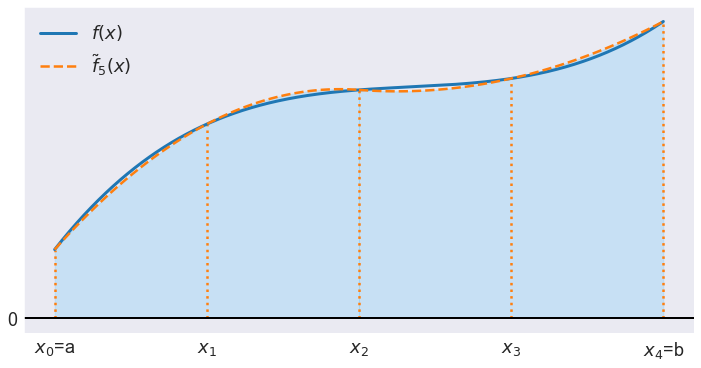

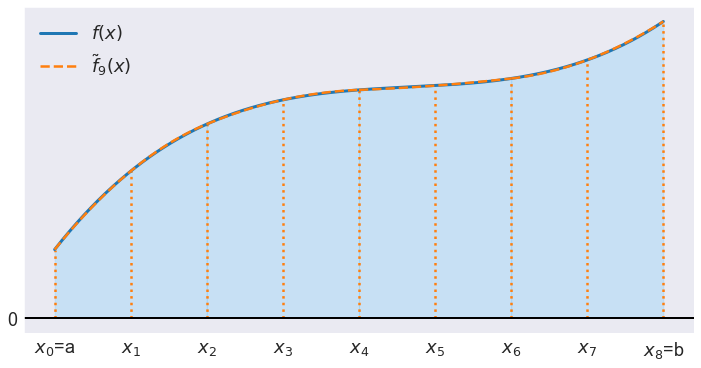

In [5]:
def plot_simp(n):
    xi, wi = qnwsimp(n+1, xmin, xmax)
    
    fig, ax = plt.subplots()
    ax.plot(x, f(x), linewidth=3)
    
    for k in range(n//2):
        xii = xi[(2*k):(2*k+3)]
        xiii = linspace(xii[0], xii[2], 125)
        p = fitquad(xii)
        ax.fill_between(xiii, p(xiii), alpha=0.35, color='LightSkyBlue')    
        ax.plot(xiii, p(xiii), color='Tab:Orange', linestyle='--')
    
    ax.vlines(xi, 0, f(xi), color='Tab:Orange', linestyle=':')
    ax.axhline(0,color='k',linewidth=2)
    
    xtl = [f'$x_{i}$' for i in range(n+1)]
    xtl[0] += '=a'
    xtl[n] += '=b'
    
    ax.set(xlim=[xmin-0.1, xmax+0.1],
           xticks=xi,
           xticklabels=xtl,
           yticks=[0],
           yticklabels=['0'])
    
    plt.legend([r'$f(x)$', f'$\\tilde{{f}}_{n+1}(x)$'])
    return fig

figs = [plot_simp(n) for n in [2, 4, 8]]
#demo.savefig(figs,name='demqua08')